# Tutkitaan datasettien ominaisuuksia

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from pyvis.network import Network

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

## Ladataan datat

In [2]:
COMPANIES = pd \
        .read_csv('data/prod_data_companies_2021_08_22.csv',
                  delimiter='\t',
                  na_values='(null)',
                  dtype={
                      'business_id': 'string',
                      'company_name': 'string',
                      'company_form': 'string',
                      'company_form_code': 'string',
                      'location_region': 'string',
                      'location_region_code': 'string',
                      'location_municipality': 'string',
                      'location_municipality_code': 'string',
                      'industry_code': 'string',
                      'company_status': 'string',
                      'company_status_code': 'string',
                      'personnel_class': 'string'
                  }
                  )

INTERACTIONS = pd \
    .read_csv('data/interactions_2021_08_19.csv',
             delimiter='\t',
             dtype={
                 'group_id': 'string',
                 'business_id': 'string',
                 'owner': 'string'
             })


group_sizes = INTERACTIONS['group_id'].value_counts()
group_sizes_df = pd.DataFrame({'group_id': group_sizes.index, 'group_size': group_sizes.values})
df_with_sizes = INTERACTIONS.merge(group_sizes_df, on='group_id')

INTERACTIONS_WITH_GROUP_SIZES = INTERACTIONS.merge(group_sizes_df, on='group_id')

print(INTERACTIONS_WITH_GROUP_SIZES)

                                    group_id business_id  \
0       3a63222b-86b2-4293-bd2e-171011190ae6    31291154   
1       3a63222b-86b2-4293-bd2e-171011190ae6    08544918   
2       3a63222b-86b2-4293-bd2e-171011190ae6    10134299   
3       3a63222b-86b2-4293-bd2e-171011190ae6    26404708   
4       3a63222b-86b2-4293-bd2e-171011190ae6    29747968   
...                                      ...         ...   
548193  8b0915ff-a0cb-4520-9160-8d783a6bf308    25610905   
548194  8b0915ff-a0cb-4520-9160-8d783a6bf308    21281841   
548195  8b0915ff-a0cb-4520-9160-8d783a6bf308    23633484   
548196  8b0915ff-a0cb-4520-9160-8d783a6bf308    23552270   
548197  8b0915ff-a0cb-4520-9160-8d783a6bf308    30073884   

                           owner  group_size  
0       603e1524d377150007c2dbea           5  
1       603e1524d377150007c2dbea           5  
2       603e1524d377150007c2dbea           5  
3       603e1524d377150007c2dbea           5  
4       603e1524d377150007c2dbea           5

## Interaktioiden määrä per käyttäjä

In [3]:
INTERACTION_COUNTS_BY_OWNER = INTERACTIONS_WITH_GROUP_SIZES.drop_duplicates('group_id').groupby(['owner']).sum()
INTERACTION_COUNTS_BY_OWNER.sort_values('group_size', ascending=False)

,group_size
owner,
5db83a1cbc3e9100062ac0ab,58913
5f5613da9769490006b0ebb3,51250
5db7f3883923700006f88455,45067
5ea289784df6a400063616c2,24962
5eb14ab8ee95ba0006769afe,23813
...,...
5ddd06cdffe5a900081b48af,1
5f3539bc44097a0007b8761d,1
5db9803bbc3e9100062ac0b4,1


In [4]:
df = INTERACTIONS_WITH_GROUP_SIZES.drop_duplicates('group_id')

df.sort_values(['owner'], ascending=False)

,group_id,business_id,owner,group_size
377955,a2203c58-dc43-4bc0-a669-b84217860d74,16264908,6112718d28e53c0007391de7,38
522888,b49212a1-d17a-4dbc-b5d9-77580b933beb,01465192,6112718d28e53c0007391de7,131
526507,59cefa34-b8c4-4565-9be3-f65345fdbe13,21109195,61126c3f28e53c0007391de6,82
525514,3a179d49-9759-42d6-816d-9fe622d160d2,15680555,61126c3f28e53c0007391de6,329
548067,8b0915ff-a0cb-4520-9160-8d783a6bf308,03063795,6110c56241e21e000857ca77,131
...,...,...,...,...
73133,b6ebd732-dd0c-4cff-b3e2-37af81fffcab,11073475,5db034c64320cd0006d2b788,58
32309,13b8fa9f-39b1-4124-a31d-b14c8087557b,02118280,5db034504320cd0006d2b787,5
45318,9cd5fb20-9eca-4bb5-9b9f-333c35b0f316,26400926,5db034504320cd0006d2b787,1
32317,99aca234-561b-4356-b89e-8c4359104f2a,08370532,5db034504320cd0006d2b787,2


## Uniikkien käyttäjien, ryhmien ja yritysten määrät interaktioissa

In [5]:
print(INTERACTIONS.info)
print('Unique users: {}'.format(INTERACTIONS['owner'].unique().shape[0]))
print('Unique groups: {}'.format(INTERACTIONS['group_id'].unique().shape[0]))
print('Unique companies: {}'.format(INTERACTIONS['business_id'].unique().shape[0]))

<bound method DataFrame.info of                                     group_id business_id  \
0       3a63222b-86b2-4293-bd2e-171011190ae6    31291154   
1       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01681709   
2       c2626398-faac-4ff3-b02d-cdc64b50cdaa    15055514   
3       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01876143   
4       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01863991   
...                                      ...         ...   
548193  8b0915ff-a0cb-4520-9160-8d783a6bf308    25610905   
548194  8b0915ff-a0cb-4520-9160-8d783a6bf308    21281841   
548195  8b0915ff-a0cb-4520-9160-8d783a6bf308    23633484   
548196  8b0915ff-a0cb-4520-9160-8d783a6bf308    23552270   
548197  8b0915ff-a0cb-4520-9160-8d783a6bf308    30073884   

                           owner  
0       603e1524d377150007c2dbea  
1       60646431ae18cb00063ed63f  
2       60646431ae18cb00063ed63f  
3       60646431ae18cb00063ed63f  
4       60646431ae18cb00063ed63f  
...                          ...  
54

## Ryhmien keskimääräinen koko/kokojakauma

Group size mean: 390.73
Group size median: 58.00
Group size mode: 1


(array([1092.,  124.,   49.,   32.,   22.,   17.,   17.,    9.,   11.,
          30.]),
 array([1.0, 400.8, 800.6, 1200.4, 1600.2, 2000.0, 2399.8, 2799.6, 3199.4,
        3599.2000000000003, 3999.0], dtype=object),
 <BarContainer object of 10 artists>)

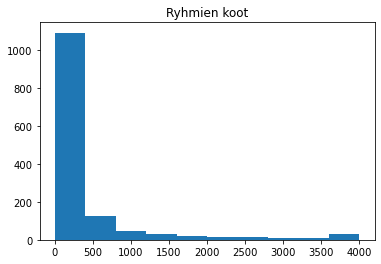

In [6]:
group_sizes = INTERACTIONS['group_id'].value_counts()

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Ryhmien koot')
plt.hist(group_sizes)


## Ryhmäkokojen tunnusluvut, group_size >= 2

Group size mean: 417.76
Group size median: 75.00
Group size mode: 2


(array([1001.,  124.,   49.,   32.,   22.,   17.,   17.,    9.,   11.,
          30.]),
 array([2.0, 401.7, 801.4, 1201.1, 1600.8, 2000.5, 2400.2, 2799.9, 3199.6,
        3599.2999999999997, 3999.0], dtype=object),
 <BarContainer object of 10 artists>)

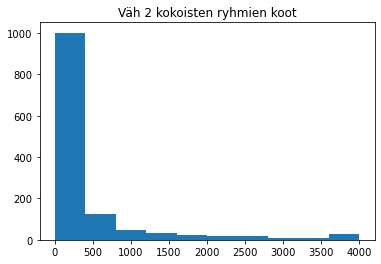

In [7]:
group_sizes_tmp = INTERACTIONS['group_id'].value_counts()
group_sizes = group_sizes_tmp[group_sizes_tmp >= 2]

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Väh 2 kokoisten ryhmien koot')
plt.hist(group_sizes)

In [9]:
INTERACTIONS_2 = INTERACTIONS_WITH_GROUP_SIZES[INTERACTIONS_WITH_GROUP_SIZES.group_size >= 2]

print(INTERACTIONS_2.info)
print('Unique users: {}'.format(INTERACTIONS_2['owner'].unique().shape[0]))
print('Unique groups: {}'.format(INTERACTIONS_2['group_id'].unique().shape[0]))
print('Unique companies: {}'.format(INTERACTIONS_2['business_id'].unique().shape[0]))

<bound method DataFrame.info of                                     group_id business_id  \
0       3a63222b-86b2-4293-bd2e-171011190ae6    31291154   
1       3a63222b-86b2-4293-bd2e-171011190ae6    08544918   
2       3a63222b-86b2-4293-bd2e-171011190ae6    10134299   
3       3a63222b-86b2-4293-bd2e-171011190ae6    26404708   
4       3a63222b-86b2-4293-bd2e-171011190ae6    29747968   
...                                      ...         ...   
548193  8b0915ff-a0cb-4520-9160-8d783a6bf308    25610905   
548194  8b0915ff-a0cb-4520-9160-8d783a6bf308    21281841   
548195  8b0915ff-a0cb-4520-9160-8d783a6bf308    23633484   
548196  8b0915ff-a0cb-4520-9160-8d783a6bf308    23552270   
548197  8b0915ff-a0cb-4520-9160-8d783a6bf308    30073884   

                           owner  group_size  
0       603e1524d377150007c2dbea           5  
1       603e1524d377150007c2dbea           5  
2       603e1524d377150007c2dbea           5  
3       603e1524d377150007c2dbea           5  
4       603e

## Ryhmäkokojen tunnusluvut, group_size >= 10

Group size mean: 531.87
Group size median: 154.50
Group size mode: 10


(array([720., 121.,  49.,  34.,  20.,  18.,  16.,   9.,  11.,  30.]),
 array([10.0, 408.9, 807.8, 1206.6999999999998, 1605.6, 2004.5,
        2403.3999999999996, 2802.2999999999997, 3201.2, 3600.1, 3999.0],
       dtype=object),
 <BarContainer object of 10 artists>)

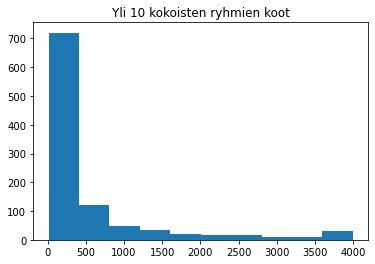

In [8]:
group_sizes_tmp = INTERACTIONS['group_id'].value_counts()
group_sizes = group_sizes_tmp[group_sizes_tmp >= 10]

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Yli 10 kokoisten ryhmien koot')
plt.hist(group_sizes)

In [56]:
INTERACTIONS_10 = INTERACTIONS_WITH_GROUP_SIZES[INTERACTIONS_WITH_GROUP_SIZES.group_size >= 10]

print(INTERACTIONS_10.info)
print('Unique users: {}'.format(INTERACTIONS_10['owner'].unique().shape[0]))
print('Unique groups: {}'.format(INTERACTIONS_10['group_id'].unique().shape[0]))
print('Unique companies: {}'.format(INTERACTIONS_10['business_id'].unique().shape[0]))

<bound method DataFrame.info of                                     group_id business_id  \
5       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01681709   
6       c2626398-faac-4ff3-b02d-cdc64b50cdaa    15055514   
7       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01876143   
8       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01863991   
9       c2626398-faac-4ff3-b02d-cdc64b50cdaa    05363070   
...                                      ...         ...   
548193  8b0915ff-a0cb-4520-9160-8d783a6bf308    25610905   
548194  8b0915ff-a0cb-4520-9160-8d783a6bf308    21281841   
548195  8b0915ff-a0cb-4520-9160-8d783a6bf308    23633484   
548196  8b0915ff-a0cb-4520-9160-8d783a6bf308    23552270   
548197  8b0915ff-a0cb-4520-9160-8d783a6bf308    30073884   

                           owner  group_size  
5       60646431ae18cb00063ed63f        1862  
6       60646431ae18cb00063ed63f        1862  
7       60646431ae18cb00063ed63f        1862  
8       60646431ae18cb00063ed63f        1862  
9       6064

## Ryhmäkokojen tunnusluvut, group_size >=50

Group size mean: 738.41
Group size median: 306.00
Group size mode: 97


(array([441., 108.,  44.,  36.,  18.,  19.,  15.,   9.,  11.,  30.]),
 array([50.0, 444.9, 839.8, 1234.6999999999998, 1629.6, 2024.5,
        2419.3999999999996, 2814.2999999999997, 3209.2, 3604.1, 3999.0],
       dtype=object),
 <BarContainer object of 10 artists>)

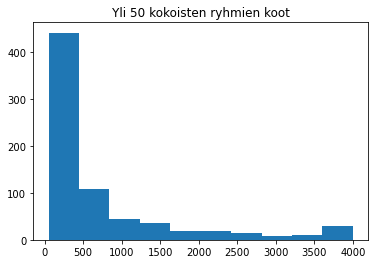

In [9]:
group_sizes_tmp = INTERACTIONS['group_id'].value_counts()
group_sizes = group_sizes_tmp[group_sizes_tmp >= 50]

print('Group size mean: {mean:.2f}'.format(mean=group_sizes.mean()))
print('Group size median: {median:.2f}'.format(median=group_sizes.median()))
print('Group size mode: {mode}'.format(mode=group_sizes.mode()[0]))

plt.figure()
plt.title('Yli 50 kokoisten ryhmien koot')
plt.hist(group_sizes)

In [57]:
INTERACTIONS_50 = INTERACTIONS_WITH_GROUP_SIZES[INTERACTIONS_WITH_GROUP_SIZES.group_size >=50]

print(INTERACTIONS_50.info)
print('Unique users: {}'.format(INTERACTIONS_50['owner'].unique().shape[0]))
print('Unique groups: {}'.format(INTERACTIONS_50['group_id'].unique().shape[0]))
print('Unique companies: {}'.format(INTERACTIONS_50['business_id'].unique().shape[0]))

<bound method DataFrame.info of                                     group_id business_id  \
5       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01681709   
6       c2626398-faac-4ff3-b02d-cdc64b50cdaa    15055514   
7       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01876143   
8       c2626398-faac-4ff3-b02d-cdc64b50cdaa    01863991   
9       c2626398-faac-4ff3-b02d-cdc64b50cdaa    05363070   
...                                      ...         ...   
548193  8b0915ff-a0cb-4520-9160-8d783a6bf308    25610905   
548194  8b0915ff-a0cb-4520-9160-8d783a6bf308    21281841   
548195  8b0915ff-a0cb-4520-9160-8d783a6bf308    23633484   
548196  8b0915ff-a0cb-4520-9160-8d783a6bf308    23552270   
548197  8b0915ff-a0cb-4520-9160-8d783a6bf308    30073884   

                           owner  group_size  
5       60646431ae18cb00063ed63f        1862  
6       60646431ae18cb00063ed63f        1862  
7       60646431ae18cb00063ed63f        1862  
8       60646431ae18cb00063ed63f        1862  
9       6064

## Verkostojen kuvaamista

### Ryhmien linkit toisiinsa

In [69]:
group_ids = INTERACTIONS['group_id'].unique()
group_ids_stack = list(group_ids)

total1 = group_ids.shape[0]
curr1 = 0

linked_groups = []

for gid1 in group_ids: # start 12:35
    curr1 += 1 

    g1_companies = set(INTERACTIONS.loc[INTERACTIONS['group_id'] == gid1]['business_id'])
    
    group_ids_stack.pop(0)
    
    curr2 = 0
    total2 = len(group_ids_stack)
    
    for gid2 in group_ids_stack:
        curr2 += 1
        print('gid1: {}/{}, gid2: {}/{}'.format(curr1, total1, curr2, total2), end="\r")
        g2_companies = set(INTERACTIONS.loc[INTERACTIONS['group_id'] == gid2]['business_id'])
        
        link_weight = len(g1_companies.intersection(g2_companies))
        
        if (link_weight > 0):
            linked_groups.append((gid1, gid2, link_weight))



   


        
        
        
print(len(linked_groups))

1858541402/1403, gid2: 1/110000


In [75]:
LINKED_GROUPS = list(linked_groups)

print(len(LINKED_GROUPS))

185854


In [83]:
GROUP_G = nx.Graph()
GROUP_G.add_weighted_edges_from(LINKED_GROUPS)

In [84]:
group_graph_vis = Network(notebook=True)
group_graph_vis.from_nx(GROUP_G)
group_graph_vis.show("group_graph.html")

KeyboardInterrupt: 

## Yritysdatan penkomista

### Kuinka monta yritystä löytyy useammasta ryhmästä?

In [11]:
business_counts = INTERACTIONS['business_id'].value_counts()
business_counts_10 = INTERACTIONS_10['business_id'].value_counts()
business_counts_50 = INTERACTIONS_50['business_id'].value_counts()


print(business_counts[0:20])
#print(business_counts_10[0:20])
#print(business_counts_50[0:20])

01490726    110
11022678    108
15923318    107
05642870    105
19274001    104
10410900    104
10983223    104
08442102    102
19992126    102
15055557    102
01084664    101
09215470    101
01120389    101
02134547    101
10453978    100
01286311    100
19274028    100
19447574    100
09342090    100
08436562     99
Name: business_id, dtype: Int64


## Opit

- Ryhmän kokojakauman perusteella pitäisi varmaan pudottaa 1:n kokoiset ryhmät pois...


## Avoimia kysymyksiä

- Mikä on sopiva minimikoko mukaanotettavalle ryhmälle?
- Mikä on sopiva minimikoko 